# Random Forest Classification

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [7]:
df_new = pd.read_csv("data_set.csv")
duplicates = df_new.duplicated().any()
pd.set_option('display.max_rows', 50)
df_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Up-sampling RF (Overfitting)

Data shape: (9630, 11)
Best hyperparameters: {'criterion': 'gini', 'n_estimators': 250}
Accuracy metric: 0.99
Precision metric: 0.981
Recall metric: 1.0
F1 metric: 0.99


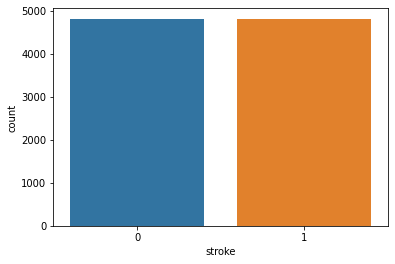

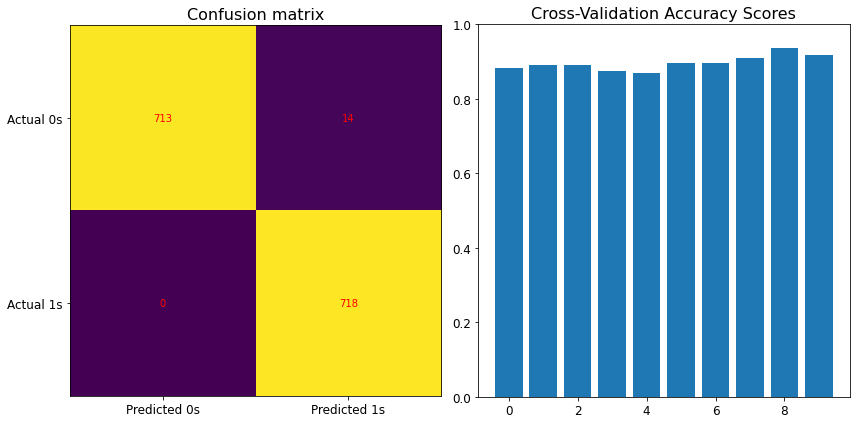


Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       727
           1       0.98      1.00      0.99       718

    accuracy                           0.99      1445
   macro avg       0.99      0.99      0.99      1445
weighted avg       0.99      0.99      0.99      1445


Score: 
0.99 

Area under ROC curve: 0.99


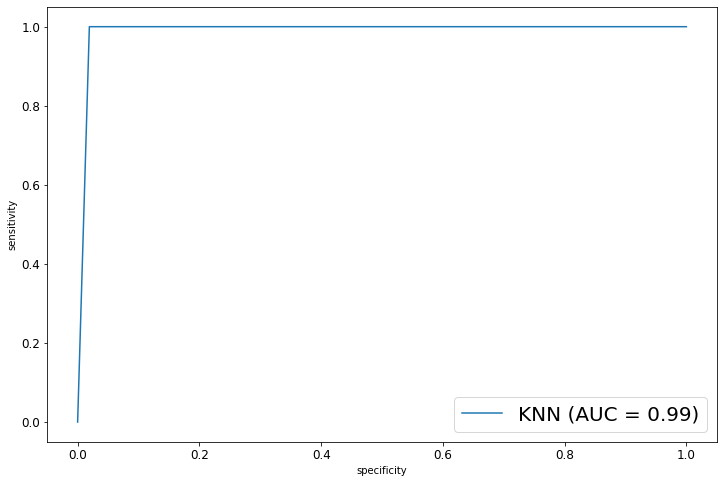

In [15]:
pd.set_option('display.max_rows', 50)
df = df_new.copy()
df = df.drop('id', axis = 1)
mean_bmi = round(df['bmi'].mean(), 1)
df_new['bmi'].fillna(mean_bmi, inplace=True)

df = df[(df['bmi'] >= 15) & (df['bmi'] <= 70)]
najwieksze_bmi = df['bmi'].max()
najmniejsze_bmi = df['bmi'].min()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['avg_glucose_level'] = scaler.fit_transform(df[['avg_glucose_level']])
df['bmi'] = scaler.fit_transform(df[['bmi']])


from sklearn.utils import resample
class_0 = df[df['stroke'] == 0]
class_1 = df[df['stroke'] == 1]

class_1_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
oversampled_data = pd.concat([class_0, class_1_oversampled])
df = oversampled_data

X = df.drop(['stroke', 'gender', 'hypertension', 'Residence_type', 'smoking_status'], axis=1)
target = df['stroke']

sns.countplot(x='stroke', data = df)
value_counts = df['stroke'].value_counts()

print("Data shape:", df.shape)

 
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.15, random_state=42)

param_grid = {
    "n_estimators": [100, 250, 500],
    "criterion": ["gini", "entropy", "log_loss"],
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

clf_best = RandomForestClassifier(**best_params)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

print("Accuracy metric:",round(metrics.accuracy_score(y_test, y_pred),3))
print("Precision metric:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall metric:",round(metrics.recall_score(y_test, y_pred),3))
print("F1 metric:",round(f1_score(y_test, y_pred, average='macro'),3))

score = clf_best.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, clf_best.predict(X_test))
cross_val_scores = cross_val_score(clf_best, X_test, y_test, cv=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(cm)
ax1.grid(False)
ax1.set_title('Confusion matrix', fontsize = 16)
ax1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm[i, j], ha='center', va='center', color='red')

ax2.bar(range(len(cross_val_scores)), cross_val_scores)
ax2.xaxis.set(label='Cross validation batch')
ax2.yaxis.set(label='Score')
ax2.set_title('Cross-Validation Accuracy Scores', fontsize = 16)
ax2.set_ylim(0.0, 1.0)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()
print("\nClassification report: ")
print(metrics.classification_report(y_test, y_pred))
print("\nScore: ")
print(round(score,3),'\n')

fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(12, 8))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot(ax=ax)
ax.legend(fontsize=20)
plt.xlabel("specificity")
plt.ylabel("sensitivity")
plt.show
pole = roc_auc_score(y_test, y_pred)
print('Area under ROC curve:', round(pole, 3))

# RF Down-sampling

Data shape: (498, 11)
Best hyperparameters: {'criterion': 'gini', 'n_estimators': 500}
Accuracy metric: 0.76
Precision metric: 0.743
Recall metric: 0.743
F1 metric: 0.759


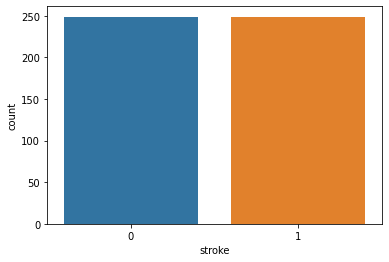

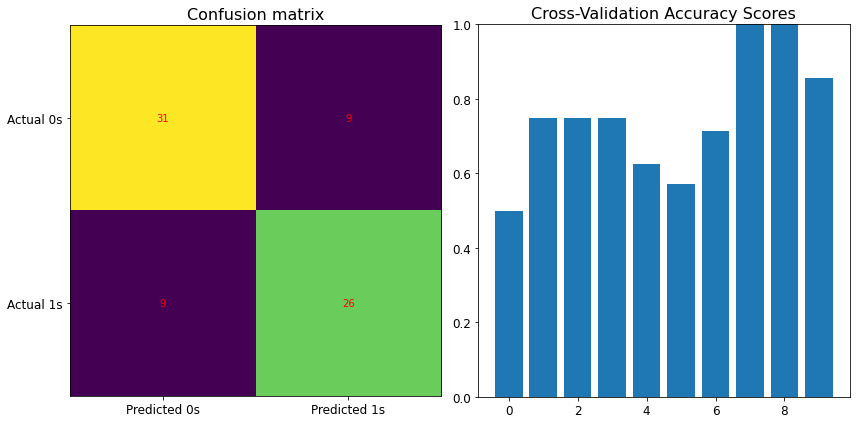


Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.74      0.74      0.74        35

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75


Score: 
0.76 

Area under ROC curve: 0.759


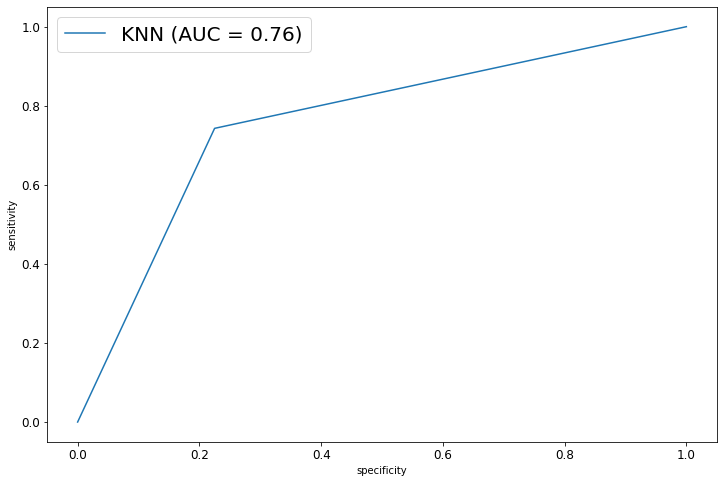

In [20]:
pd.set_option('display.max_rows', 50)
df = df_new.copy()
df = df.drop('id', axis = 1)
mean_bmi = round(df['bmi'].mean(), 1)
df_new['bmi'].fillna(mean_bmi, inplace=True)

df = df[(df['bmi'] >= 15) & (df['bmi'] <= 70)]
najwieksze_bmi = df['bmi'].max()
najmniejsze_bmi = df['bmi'].min()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['avg_glucose_level'] = scaler.fit_transform(df[['avg_glucose_level']])
df['bmi'] = scaler.fit_transform(df[['bmi']])


from sklearn.utils import resample
class_0 = df[df['stroke'] == 0]
class_1 = df[df['stroke'] == 1]

class_0_undersampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)
undersampled_data = pd.concat([class_0_undersampled, class_1])
df = undersampled_data

X = df.drop(['stroke', 'gender', 'hypertension', 'Residence_type', 'smoking_status'], axis=1)
target = df['stroke']

sns.countplot(x='stroke', data = df)
value_counts = df['stroke'].value_counts()

print("Data shape:", df.shape)

 
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.15, random_state=42)

param_grid = {
    "n_estimators": [100, 250, 500],
    "criterion": ["gini", "entropy", "log_loss"],
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

clf_best = RandomForestClassifier(**best_params)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

print("Accuracy metric:",round(metrics.accuracy_score(y_test, y_pred),3))
print("Precision metric:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall metric:",round(metrics.recall_score(y_test, y_pred),3))
print("F1 metric:",round(f1_score(y_test, y_pred, average='macro'),3))

score = clf_best.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, clf_best.predict(X_test))
cross_val_scores = cross_val_score(clf_best, X_test, y_test, cv=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(cm)
ax1.grid(False)
ax1.set_title('Confusion matrix', fontsize = 16)
ax1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm[i, j], ha='center', va='center', color='red')

ax2.bar(range(len(cross_val_scores)), cross_val_scores)
ax2.xaxis.set(label='Cross validation batch')
ax2.yaxis.set(label='Score')
ax2.set_title('Cross-Validation Accuracy Scores', fontsize = 16)
ax2.set_ylim(0.0, 1.0)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()
print("\nClassification report: ")
print(metrics.classification_report(y_test, y_pred))
print("\nScore: ")
print(round(score,3),'\n')

fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(12, 8))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot(ax=ax)
ax.legend(fontsize=20)
plt.xlabel("specificity")
plt.ylabel("sensitivity")
plt.show
pole = roc_auc_score(y_test, y_pred)
print('Area under ROC curve:', round(pole, 3))